<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

# Описание проекта
Данные находятся в трёх файлах:
- gold_industry_train.csv — обучающая выборка;
- gold_industry_test.csv — тестовая выборка;
- gold_industry_full.csv — исходные данные.

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи.
Некоторые параметры недоступны, потому что замеряются и/или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей. Также в тестовом наборе нет целевых признаков.
Исходный датасет содержит обучающую и тестовую выборки со всеми признаками.

В вашем распоряжении сырые данные: их просто выгрузили из хранилища. Прежде чем приступить к построению модели, проверьте по нашей инструкции их на корректность.


# Описание данных
Технологический процесс

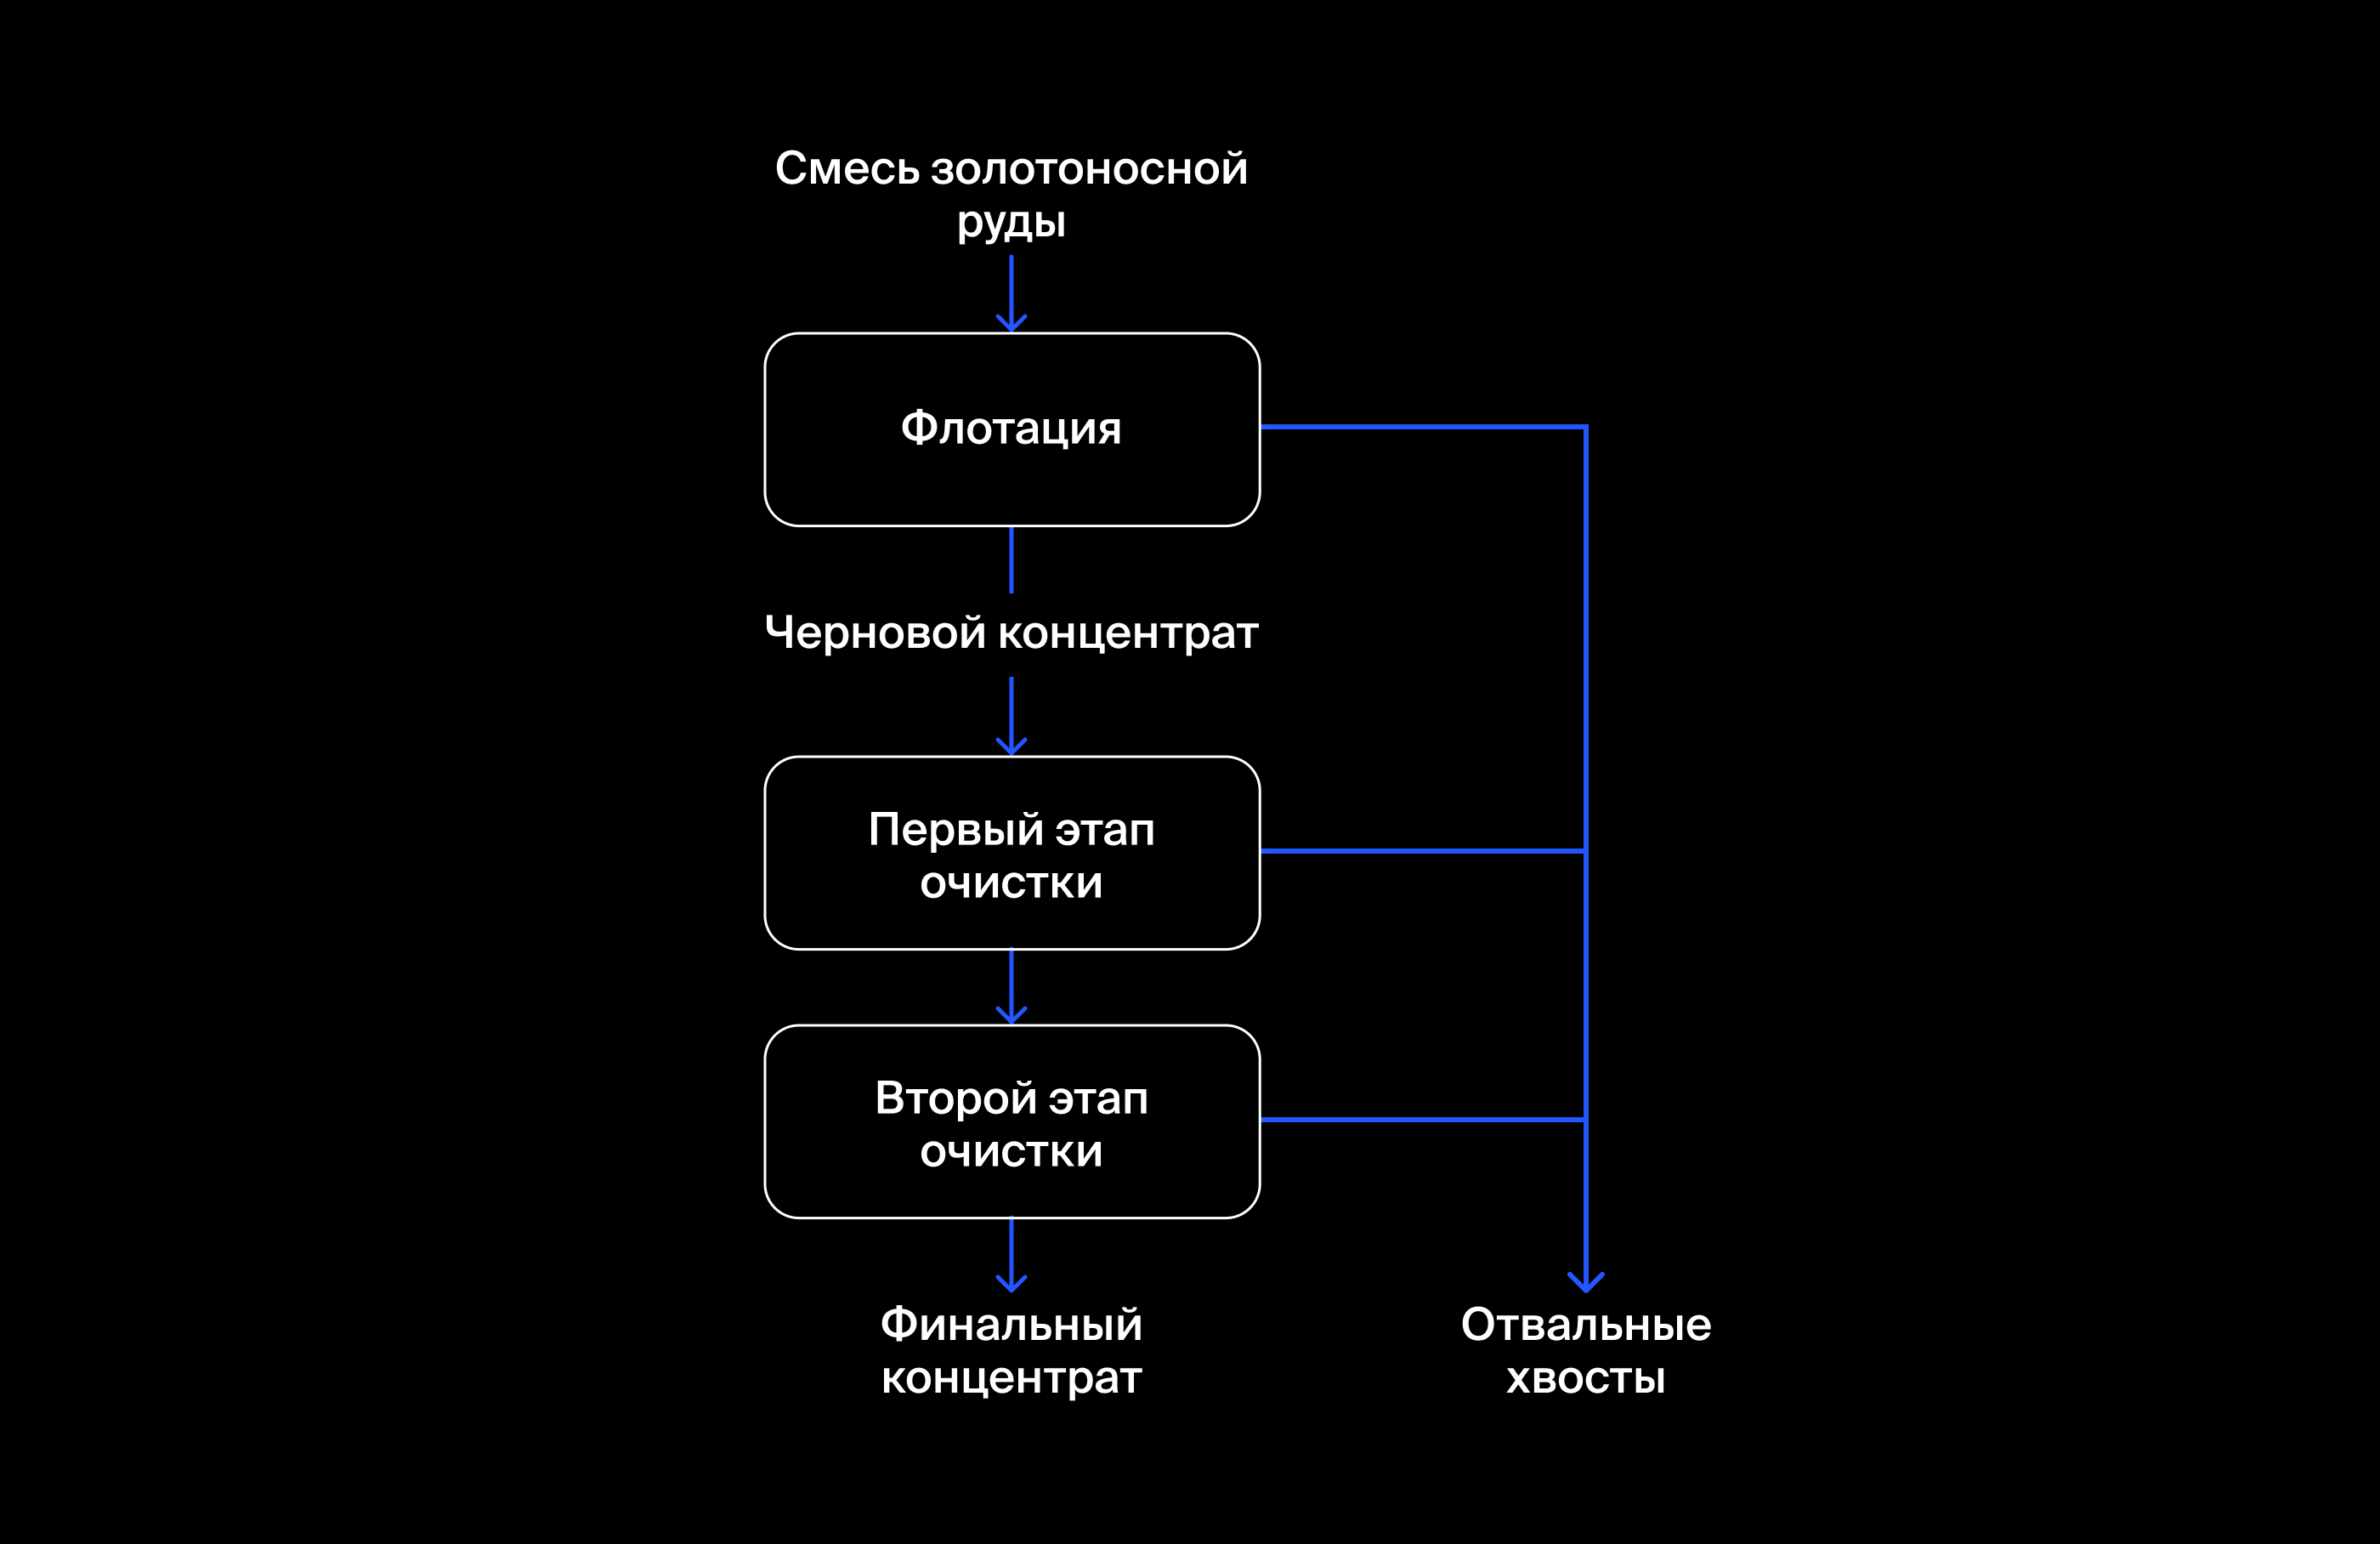

- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
  - Xanthate — ксантогенат (промотер, или активатор флотации);
  - Sulphate — сульфат (на данном производстве сульфид натрия);
  - Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
-  Final Au — финальный концентрат золота

Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

# Наименование признаков
Наименование признаков должно быть такое:
[этап].[тип_параметра].[название_параметра]
Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

Расчёт эффективности
Вам нужно смоделировать процесс восстановления золота из золотосодержащей руды.

## Подготовка данных

In [1]:
import pandas as pd 

In [2]:
df_train = pd.read_csv('/datasets/gold_industry_train.csv')
df_test = pd.read_csv('/datasets/gold_industry_test.csv')
df_full = pd.read_csv('/datasets/gold_industry_full.csv')

In [3]:
df_dict = {'1': df_train,
           '2': df_test,
           '3': df_full}

for i in df_dict:
    display(df_dict[i].head())
    df_dict[i].info()
    
# df_list = [df_train, df_test, df_full]

# for i in df_list:
#     display(i.head())
#     i.info()

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,...,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,...,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,...,23.032807,-501.287889,19.977466,-500.159903,17.980463,-500.504602,12.949071,-500.009937,20.010332,-508.337973
4,2017-12-09 18:59:59,5.735249,6.165220,4.512346,37.810642,558.713584,86.434874,7.823471,7.490356,1198.005449,...,23.001911,-499.947838,20.023735,-499.713680,17.990955,-500.334769,13.007523,-499.968459,19.995999,-499.788805


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,...,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,...,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,...,9.001494,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514
2,2016-01-15 02:00:00,6.362222,6.116455,2.159622,35.971630,530.026610,57.510649,11.920603,6.197377,999.719565,...,8.842896,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849
3,2016-01-15 03:00:00,6.118189,6.043309,2.037807,36.862241,542.590390,57.792734,11.630094,6.203177,999.814770,...,9.122857,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835
4,2016-01-15 04:00:00,5.663707,6.060915,1.786875,34.347666,540.531893,56.047189,10.957755,6.198826,999.678690,...,8.871028,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


Мы имеем 3 датасета:
- тренировочный (14579 entries / 87 columns)
- тестовый (4860 entries / 53 columns)
- полный (19439 entries / 87 columns)

В тестовом датасете отсутствуют некоторые столбцы, с помощью которых считается целевые признаки 'rougher.output.recovery'  и 'final.output.recovery':
- rougher.output.concentrate_au 
- rougher.output.tail_au
- final.output.concentrate_au 
- final.output.tail_au  

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. 

Эффективность обогащения рассчитывается по формуле

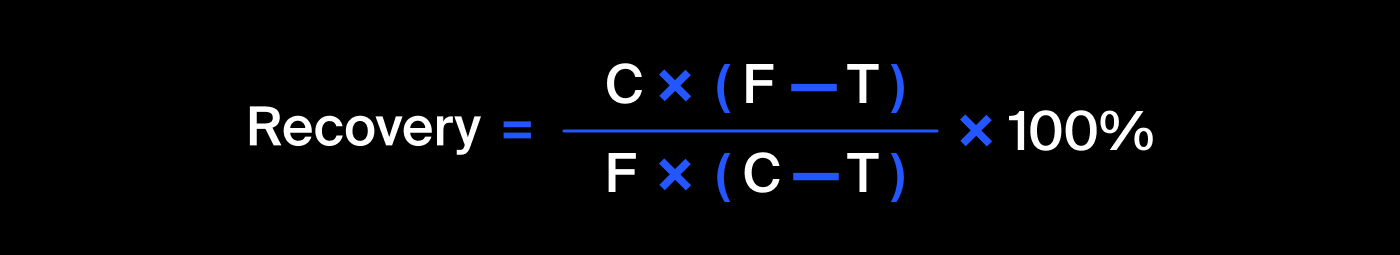

где:
- C — доля золота в концентрате после флотации/очистки;
- F — доля золота в сырье/концентрате до флотации/очистки;
- T — доля золота в отвальных хвостах после флотации/очистки.

 

In [4]:
C = df_train['rougher.output.concentrate_au']
F = df_train['rougher.input.feed_au']
T = df_train['rougher.output.tail_au']

recovery = C * (F - T) / (F * (C - T)) * 100

df_recovery_by_me = pd.DataFrame(recovery, columns=['recovery_by_me'])
df_recovery_by_client = df_train['rougher.output.recovery'].to_frame()
df_recovery_by_client.columns = ['recovery_by_client']

merged_df = df_recovery_by_me.merge(df_recovery_by_client, left_index=True, right_index=True)
merged_df

,recovery_by_me,recovery_by_client
0,87.107763,87.107763
1,86.843261,86.843261
2,86.842308,86.842308
3,87.226430,87.226430
4,86.688794,86.688794
...,...,...
14574,87.684717,87.684717
14575,90.677361,90.677361
14576,89.574376,89.574376
14577,87.724007,87.724007


Recovey расчитанн правильно

Найдем MAE между расчётами и значением признака. 

In [5]:
from sklearn.metrics import mean_absolute_error 

mae = mean_absolute_error(df_recovery_by_client, df_recovery_by_me) 
print("MAE:", mae)

MAE: 9.83758577644259e-15


MAE между нашими расчетами и рассчетами клиента - 9.83758577644259e-15. 
Это означает, что модель имеет очень низкую среднюю абсолютную ошибку, что является хорошим показателем точности модели.

Проанализируем недоступные признаки в тестовой выборке c помощью метода symmetric_difference()

In [6]:
column_diff = set(df_train.columns).symmetric_difference(set(df_test.columns))
column_diff

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Как видно из разницы признаков, в тестовой выборке отсутствуют выходные значения типа output, т.е. то что происходит обогащения. 

In [7]:
for i in df_dict:
    check_for_null = df_dict[i].isna().sum().sum()
    print(check_for_null)

3050
375
4481


Пропуски в датафреймах:

- 3050 в тренировочной выборке  
- 375 в тестовой выборке 
- 4481 в полной выборке 

In [8]:
for i, k in df_dict.items():
    df_dict[i] = k.fillna(method='ffill')
    
for i in df_dict:
    check_for_null = df_dict[i].isna().sum().sum()
    print(check_for_null)  

0
0
0


Заменил пропуски предыдущими значениями, т.к. удалять данные не хочется, потому что обьем с пропусками значителен. Заменил предыдущими значениями т.к. все данные очень близки друг к другу, так что средним или медианной мне кажется тут заполнить не получится 

In [9]:
for i in df_dict:
    check_for_duplicates = df_dict[i].duplicated().sum()
    print(check_for_duplicates)

0
0
0


In [10]:
df_train = df_train.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

Дубликатов нет

###### Итоги:
- Проанализировали первичную информацию по данным
- Проверилики признак Recovey на корректность
- Расчитали MAE между нашими расчетами и первоначальными рассчетами. MAE - 9.83 Это означает, что модель имеет очень низкую среднюю абсолютную ошибку, что является хорошим показателем точности модели.
- Как видно из разницы признаков, в тестовой выборке отсутствуют выходные значения типа output, т.е. то что происходит обогащения.
- Заменили пропуски в датафреймах предыдущими значениями
- Проверили наличие дупликатов 


## Анализ данных

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

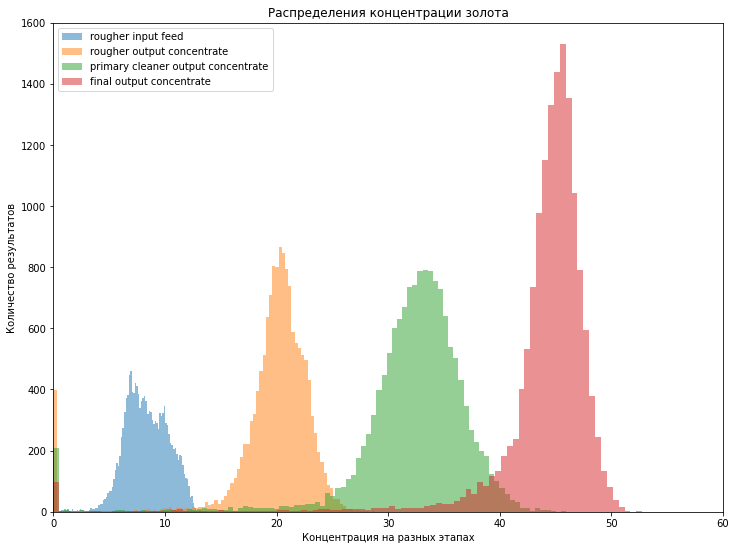

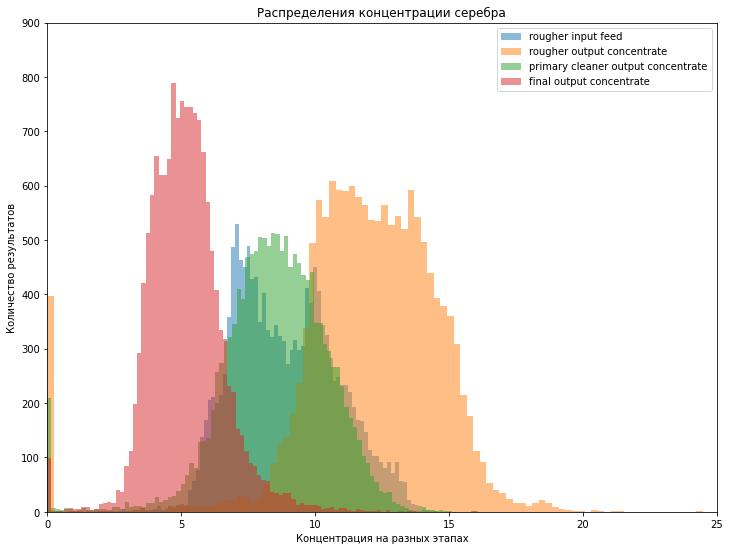

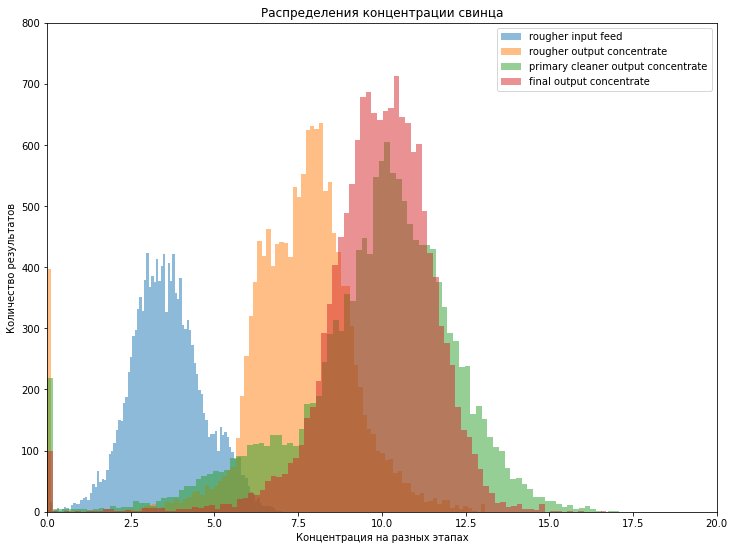

In [11]:
import matplotlib.pyplot as plt

def plot_histograms(data, labels, xlim, ylim, title):
    plt.figure(figsize=[12,9])
    
    for i in range(len(data)):
        plt.hist(data[i], bins=100, label=labels[i], alpha=0.5)
    
    plt.xlim(xlim)
    plt.ylim(ylim)  
    plt.xlabel("Концентрация на разных этапах")
    plt.ylabel("Количество результатов")
    plt.legend(loc='best', fontsize='medium')
    plt.title(title)
    plt.show()
    
metal_au = [df_train['rougher.input.feed_au'],
            df_train['rougher.output.concentrate_au'],
            df_train['primary_cleaner.output.concentrate_au'],
            df_train['final.output.concentrate_au']]

metal_ag = [df_train["rougher.input.feed_ag"], 
            df_train["rougher.output.concentrate_ag"], 
            df_train["primary_cleaner.output.concentrate_ag"], 
            df_train["final.output.concentrate_ag"]]

metal_pb = [df_train["rougher.input.feed_pb"], 
            df_train["rougher.output.concentrate_pb"], 
            df_train["primary_cleaner.output.concentrate_pb"], 
            df_train["final.output.concentrate_pb"]]

labels = ['rougher input feed',
          'rougher output concentrate',
          'primary cleaner output concentrate',
          'final output concentrate']

plot_histograms(metal_au, labels, xlim=[0, 60], ylim=[0, 1600],  title='Распределения концентрации золота')
plot_histograms(metal_ag, labels, xlim=[0, 25], ylim=[0, 900],title='Распределения концентрации серебра')
plot_histograms(metal_pb, labels, xlim=[0, 20], ylim=[0, 800],title='Распределения концентрации свинца')

- Концентрация золота значительно увеличивается на протяжении всех этапов обработки. Максимальный концентрат золото происходит на финальной стадии.
- Концентрация серебра незначительно уменьшается на протяжении всех этапов обработки.
- Концентрация свинца незначительно увеличиваетсяна протяжении всех этапов обработки.
- Есть аномальные значения в районе нуля

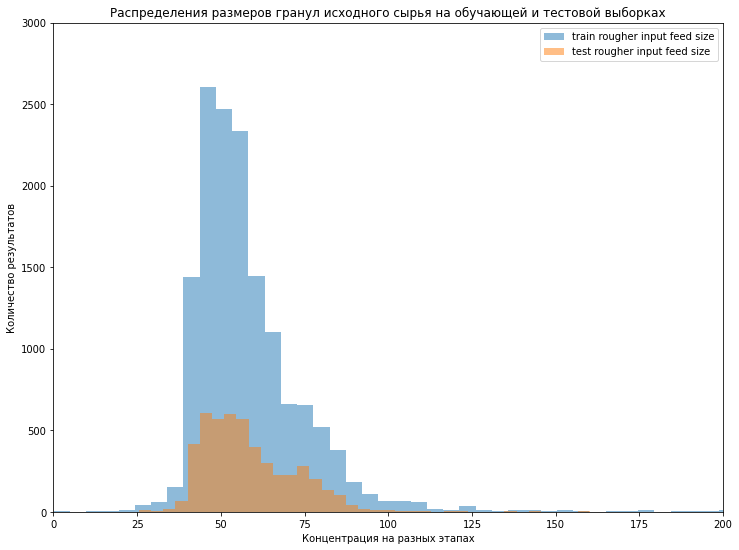

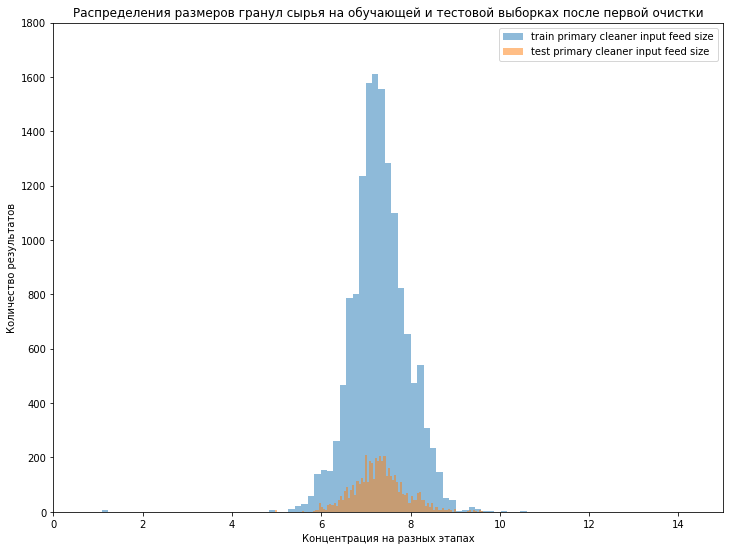

In [12]:
df_rougher_feed_size_train_test = [df_train['rougher.input.feed_size'],
                                   df_test['rougher.input.feed_size']]

df_primary_feed_size_train_test = [df_train['primary_cleaner.input.feed_size'],
                                   df_test['primary_cleaner.input.feed_size']]

labels_rougher = ['train rougher input feed size',
                  'test rougher input feed size']

labels_primary = ['train primary cleaner input feed size',
                  'test primary cleaner input feed size']

plot_histograms(df_rougher_feed_size_train_test, 
                labels_rougher, 
                xlim=[0, 200], 
                ylim=[0, 3000],
                title='Распределения размеров гранул исходного сырья на обучающей и тестовой выборках')

plot_histograms(df_primary_feed_size_train_test, 
                labels_primary, 
                xlim=[0, 15], 
                ylim=[0, 1800],
                title='Распределения размеров гранул сырья на обучающей и тестовой выборках после первой очистки')

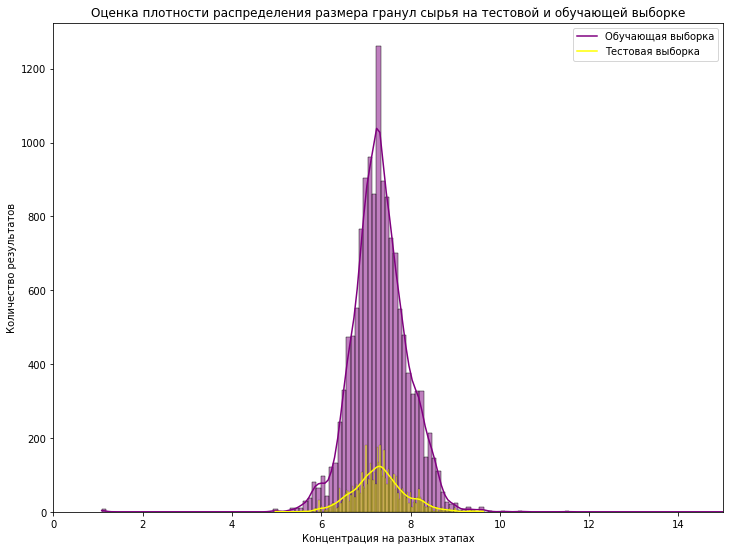

In [112]:
import seaborn as sns
plt.figure(figsize=[12,9])
plt.xlim(0, 15)

ax = sns.histplot(df_train['primary_cleaner.input.feed_size'], 
                  bins=150, 
                  kde=True,
                  color='purple',
                  alpha=0.5)

ax = sns.histplot(df_test['primary_cleaner.input.feed_size'], 
                  bins=150, 
                  kde=True,
                  color='yellow',
                  alpha=0.5)
       
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='best', fontsize='medium')
plt.xlabel("Концентрация на разных этапах")
plt.ylabel("Количество результатов")
plt.title('Оценка плотности распределения размера гранул сырья на тестовой и обучающей выборке', fontsize='large')

plt.show()

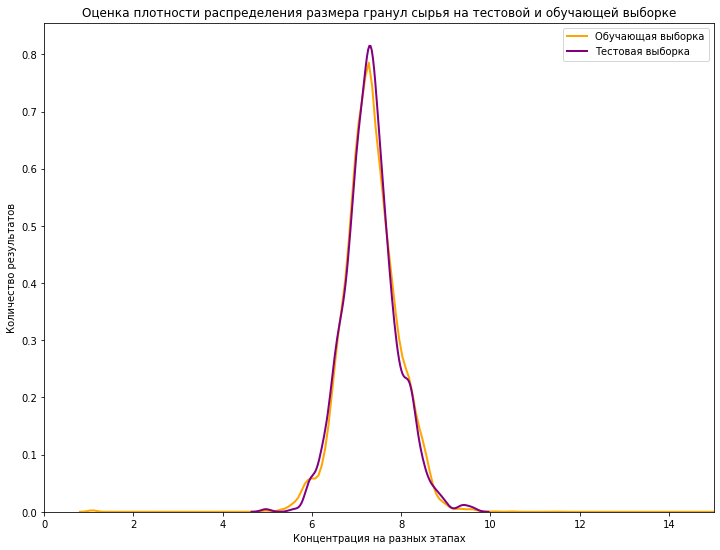

In [114]:
import seaborn as sns
plt.figure(figsize=[12,9])

ax = sns.kdeplot(df_train['primary_cleaner.input.feed_size'], color='orange', lw=2)
ax = sns.kdeplot(df_test['primary_cleaner.input.feed_size'], color='purple', lw=2)
       
plt.xlim(0, 15)

plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='best', fontsize='medium')
plt.xlabel("Концентрация на разных этапах")
plt.ylabel("Количество результатов")
plt.title('Оценка плотности распределения размера гранул сырья на тестовой и обучающей выборке', fontsize='large')

plt.show()

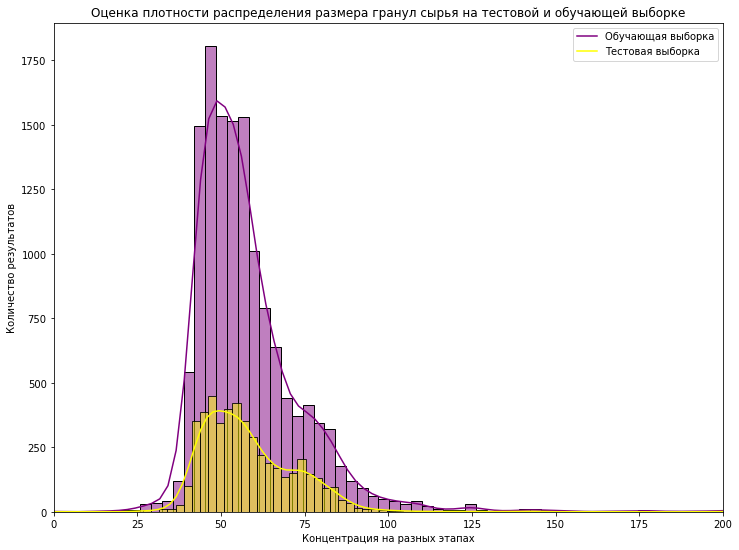

In [95]:
import seaborn as sns
plt.figure(figsize=[12,9])
plt.xlim(0, 200)

ax = sns.histplot(df_train['rougher.input.feed_size'], 
                  bins=150, 
                  kde=True,
                  color='purple',
                  alpha=0.5)

ax = sns.histplot(df_test['rougher.input.feed_size'], 
                  bins=150, 
                  kde=True,
                  color='yellow',
                  alpha=0.5)
       
plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='best', fontsize='medium')
plt.xlabel("Концентрация на разных этапах")
plt.ylabel("Количество результатов")
plt.title('Оценка плотности распределения размера гранул сырья на тестовой и обучающей выборке', fontsize='large')

plt.show()

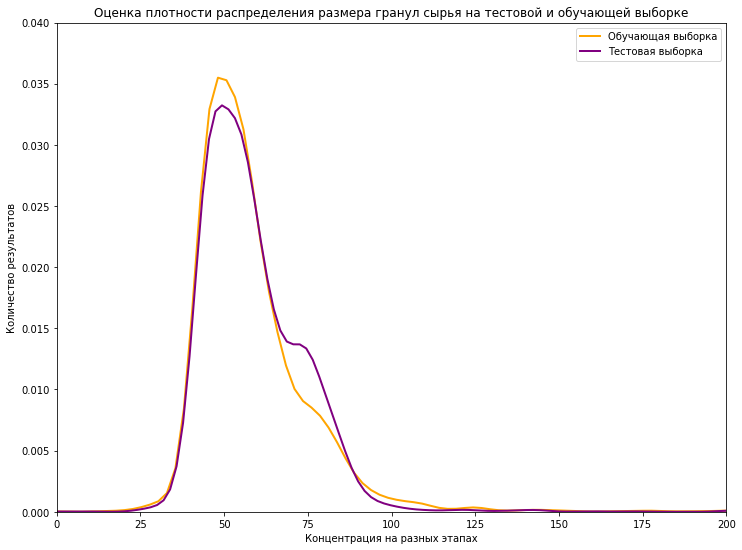

In [101]:
import seaborn as sns
plt.figure(figsize=[12,9])

ax = sns.kdeplot(df_train['rougher.input.feed_size'], color='orange', lw=2)
ax = sns.kdeplot(df_test['rougher.input.feed_size'], color='purple', lw=2)
       
plt.xlim(0, 200)
plt.ylim(0, 0.040) 

plt.legend(['Обучающая выборка', 'Тестовая выборка'], loc='best', fontsize='medium')
plt.xlabel("Концентрация на разных этапах")
plt.ylabel("Количество результатов")
plt.title('Оценка плотности распределения размера гранул сырья на тестовой и обучающей выборке', fontsize='large')

plt.show()

Распределения выглядят одинаковыми

Исследуем суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате.

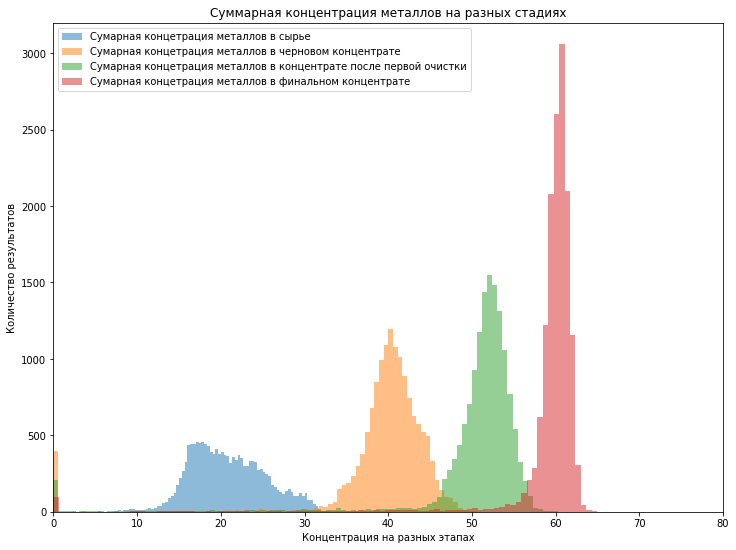

In [13]:
rougher_input_feed_sum_train = (df_train['rougher.input.feed_au'] + 
                                df_train['rougher.input.feed_ag'] + 
                                df_train['rougher.input.feed_pb'])


rougher_output_concentrate_sum_train = (df_train['rougher.output.concentrate_au'] + 
                                        df_train['rougher.output.concentrate_ag'] + 
                                        df_train['rougher.output.concentrate_pb'])


primary_cleaner_output_concentrate_sum_train = (df_train['primary_cleaner.output.concentrate_au'] + 
                                                df_train['primary_cleaner.output.concentrate_ag'] + 
                                                df_train['primary_cleaner.output.concentrate_pb'])


final_output_concentrate_sum_train = (df_train['final.output.concentrate_au'] + 
                                      df_train['final.output.concentrate_ag'] + 
                                      df_train['final.output.concentrate_pb'])


data_sum = [rougher_input_feed_sum_train, 
            rougher_output_concentrate_sum_train, 
            primary_cleaner_output_concentrate_sum_train, 
            final_output_concentrate_sum_train]

labels_sum = ['Сумарная концетрация металлов в сырье',
              'Сумарная концетрация металлов в черновом концентрате',
              'Сумарная концетрация металлов в концентрате после первой очистки',
              'Сумарная концетрация металлов в финальном концентрате']

plot_histograms(data_sum, 
                labels_sum, 
                xlim=[0, 80], 
                ylim=[0, 3200],
                title='Cуммарная концентрация металлов на разных стадиях')

Существует аномальная концентрация металлов в районе нуля на этапе 1-й, 2-й и финальной обработок, уберем их, чтобы они не мешали обучению модели и перепроверим график

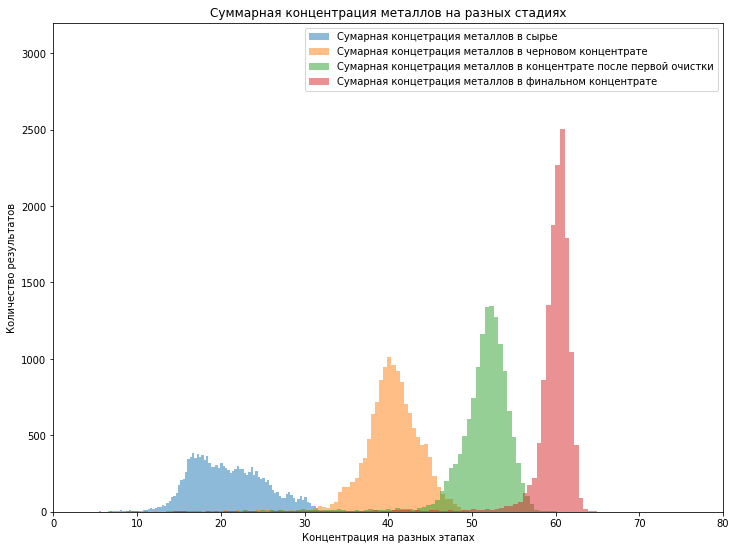

In [14]:
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_au'] < 1].index)
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_ag'] < 1].index)
df_train = df_train.drop(df_train[df_train['rougher.output.concentrate_pb'] < 1].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_au'] < 1].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_ag'] < 1].index)
df_train = df_train.drop(df_train[df_train['primary_cleaner.output.concentrate_pb'] < 1].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_au'] < 1].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_ag'] < 1].index)
df_train = df_train.drop(df_train[df_train['final.output.concentrate_pb'] < 1].index)

rougher_input_feed_sum_train = (df_train['rougher.input.feed_au'] + 
                                df_train['rougher.input.feed_ag'] + 
                                df_train['rougher.input.feed_pb'])


rougher_output_concentrate_sum_train = (df_train['rougher.output.concentrate_au'] + 
                                        df_train['rougher.output.concentrate_ag'] + 
                                        df_train['rougher.output.concentrate_pb'])


primary_cleaner_output_concentrate_sum_train = (df_train['primary_cleaner.output.concentrate_au'] + 
                                                df_train['primary_cleaner.output.concentrate_ag'] + 
                                                df_train['primary_cleaner.output.concentrate_pb'])


final_output_concentrate_sum_train = (df_train['final.output.concentrate_au'] + 
                                      df_train['final.output.concentrate_ag'] + 
                                      df_train['final.output.concentrate_pb'])


data_sum = [rougher_input_feed_sum_train, 
            rougher_output_concentrate_sum_train, 
            primary_cleaner_output_concentrate_sum_train, 
            final_output_concentrate_sum_train]

labels_sum = ['Сумарная концетрация металлов в сырье',
              'Сумарная концетрация металлов в черновом концентрате',
              'Сумарная концетрация металлов в концентрате после первой очистки',
              'Сумарная концетрация металлов в финальном концентрате']

plot_histograms(data_sum, 
                labels_sum, 
                xlim=[0, 80], 
                ylim=[0, 3200],
                title='Cуммарная концентрация металлов на разных стадиях')

Аномалии обработали и проверили график снова.

###### Итоги:
- Проверили как меняется концентрация металлов (Au, Ag, Pb) на различных этапах: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате:
  - Концентрация золота значительно увеличивается на протяжении всех этапов обработки. Максимальный концентрат золото происходит на финальной стадии.
  - Концентрация серебра незначительно уменьшается на протяжении всех этапов обработки.
  - Концентрация свинца незначительно увеличиваетсяна протяжении всех этапов обработки.
  - Есть аномальные значения в районе нуля

- Проверили распределения размеров гранул исходного сырья на обучающей и тестовой выборках - распределения одинаковые

- Исследовали суммарную концентрацию металлов на разных стадиях: в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. Выявили аномальную концентрацию металлов в нулевом значении (0-1) на этапе 1-й, 2-й и финальной обработок. Аномалии обработали.


## Модель

Формула sMAPE

In [15]:
import numpy as np
from sklearn.metrics import make_scorer

#def sMAPE(y_true,y_pred):
#    error = np.mean(abs(y_true - y_pred)/((abs(y_true)+abs(y_pred))/2))*100
#    return error

#def final_sMAPE(sMAPE_rougher,sMAPE_final):
#    return (0.25*sMAPE_rougher + 0.75*sMAPE_final)

def sMAPE(target, predict):
    target = target.to_numpy()
    total = 0
    for y in range(len(target)):
        total += abs(target[y, 0] - predict[y, 0]) / (abs(target[y, 0] + predict[y, 0]) / 2)
    sMAPE_1 = total / len(target) * 100
    
    total = 0
    for y in range(len(target)):
        total += abs(target[y, 1] - predict[y, 1]) / (abs(target[y, 1] + predict[y, 1]) / 2)
    sMAPE_2 = total / len(target) * 100
    
    return 0.25 * sMAPE_1 + 0.75 * sMAPE_2

smape = make_scorer(sMAPE,greater_is_better=False)

Подготовим признаки для модели

In [16]:
#df_train = df_train.set_index('date') # устанавливаем date в роли индекса что бы соединить по общему индексу
#df_test = df_test.set_index('date')
#df_full = df_full.set_index('date')

#df_test_merged = df_test.merge(df_full, how='left', copy=False) #copy  - чтобы не дублировались признаки
#df_train_merged = df_train.merge(df_full, how='left', copy=False)

columns_to_delete = set(df_train.columns) - set(df_test.columns)
columns_to_delete -= {'rougher.output.recovery', 'final.output.recovery'}
df_train = df_train.drop(columns=columns_to_delete)

#df_test['rougher.output.recovery'] = df_full['rougher.output.recovery']
#df_test['final.output.recovery'] = df_full['final.output.recovery']

filtered_df_full = df_full[df_full['date'].isin(df_test['date'])]
df_test = df_test.merge(filtered_df_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date', how='left')

df_test = df_test.drop('date', axis=1)
df_train = df_train.drop('date', axis=1)

print(df_train.shape)
print(df_test.shape)

(13834, 54)
(4860, 54)


Разбиваем выборки на features и target

In [17]:
features_train = df_train.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)
features_test = df_test.drop(columns=["rougher.output.recovery", "final.output.recovery"], axis=1)

target_train = df_train[["rougher.output.recovery", "final.output.recovery"]]
target_test = df_test[["rougher.output.recovery", "final.output.recovery"]]

print(f'Размер выборки train: {features_train.shape}, {target_train.shape}')
print(f'Размер выборки test: {features_test.shape}, {target_test.shape}')


Размер выборки train: (13834, 52), (13834, 2)
Размер выборки test: (4860, 52), (4860, 2)


Стандартизируем данные перед началом обучения что позволяет уравновесить вклад каждого признака 

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_train_scaled = scaler.fit_transform(features_train)
features_test_scaled = scaler.transform(features_test)

print(f'Размер выборки train: {features_train_scaled.shape}, {target_train.shape}')
print(f'Размер выборки test: {features_test_scaled.shape}, {target_test.shape}')

Размер выборки train: (13834, 52), (13834, 2)
Размер выборки test: (4860, 52), (4860, 2)


Дерево решений

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'max_depth' : range(1,20,2)
}

grid_search = RandomizedSearchCV(estimator = DecisionTreeRegressor(random_state = 123), 
                           param_distributions = param_grid, 
                           scoring = smape, 
                           cv = 5,
                           n_jobs = -1, 
                           verbose = 2) 

grid_search.fit(features_train_scaled, target_train)

best_depth_dtr = grid_search.best_params_['max_depth']

print('Best score:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=1; total time=   0.1s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=3; total time=   0.2s
[CV] END ........................................max_depth=5; total time=   0.3s
[CV] END .......................................

Случайный лес

In [20]:
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators': range(10,50,10),
    'max_depth' : range(1,12,2),
}

grid_search = RandomizedSearchCV(estimator = RandomForestRegressor(random_state = 123), 
                           param_distributions = param_grid, 
                           scoring = smape, 
                           cv = 5,
                           n_jobs = -1, 
                           verbose = 2) 

grid_search.fit(features_train_scaled, target_train)

best_estimators_rfc = grid_search.best_params_['n_estimators']
best_depth_rfc = grid_search.best_params_['max_depth']

print('Best score:', grid_search.best_score_)
print('Best parameters:', grid_search.best_params_) 
    

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .......................max_depth=9, n_estimators=30; total time=   9.0s
[CV] END .......................max_depth=9, n_estimators=30; total time=   9.1s
[CV] END .......................max_depth=9, n_estimators=30; total time=   9.0s
[CV] END .......................max_depth=9, n_estimators=30; total time=   9.5s
[CV] END .......................max_depth=9, n_estimators=30; total time=   9.3s
[CV] END .......................max_depth=1, n_estimators=40; total time=   1.7s
[CV] END .......................max_depth=1, n_estimators=40; total time=   1.8s
[CV] END .......................max_depth=1, n_estimators=40; total time=   1.7s
[CV] END .......................max_depth=1, n_estimators=40; total time=   1.8s
[CV] END .......................max_depth=1, n_estimators=40; total time=   1.8s
[CV] END .......................max_depth=1, n_estimators=20; total time=   0.9s
[CV] END .......................max_depth=1, n_e

Линейная регрессия

In [21]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
scores = cross_val_score(model, 
                         features_train_scaled, 
                         target_train, 
                         cv=5, 
                         scoring=smape)

mean_smape = scores.mean()

print('Best score:', mean_smape)

Best score: -8.852850259896268


Проверка на тестовой выборке 

Случайный лес

In [22]:
model = RandomForestRegressor(random_state = 123, 
                               n_estimators = best_estimators_rfc,
                               max_depth = best_depth_rfc)

model.fit(features_train_scaled, target_train)
predictions = model.predict(features_test_scaled)

sMAPE_test = sMAPE(target_test, predictions)
print('Итоговый sMAPE на тестовой выборке:', sMAPE_test)

Итоговый sMAPE на тестовой выборке: 7.339431867368646


In [23]:
from sklearn.dummy import DummyRegressor

dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(features_train_scaled, target_train)
predicted_dummy = dummy_regr.predict(features_test_scaled)

sMAPE_dummy = sMAPE(target_test, predicted_dummy)
print('Итоговый sMAPE на dummy:', sMAPE_dummy)

Итоговый sMAPE на dummy: 8.466872036533752


###### Итоги:
- Обучили модель Дерева решений 
  - Результат на тренировочной: -8.71524604550918

- Обучили модель Случайного леса
  - Результат на тренировочной: -8.474817659330645
    
- Обучили модель Линейной регрессии
  - Результат на тренировочной: -8.852850259896268


Лучшая модель - случайный лес
- Проверка на тестовой модели Случайного леса
  - Результат: 7.339431867368646
- Проверка адекватности модели 
  - sMAPE при DummyRegressor: 8.466872036533752
  
  
Анализируя эти результаты, можно сделать следующие выводы:

- DummyRegressor имеет значение sMAPE равное 8.466872036533752, что можно использовать как базовую метрику для сравнения с другими моделями. Это означает что наша модель прошла проверку на качество предсказания